In [351]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

def adaptiveEpsilonGreedy(epsilon, epsilon_decay, epsilon_min):
    if epsilon > epsilon_min:
        epsilon = epsilon*epsilon_decay
    return epsilon

env = gym.make("Taxi-v3").env
num_state = env.observation_space.n
num_action = env.action_space.n

# 500 state - 6 action
q_table = np.zeros((num_state,num_action))

#Hyperparameter

"""learning_rate = 0.7
discount_rate = 0.5
epsilon = 1 
epsilon_decay = 0.1
epsilon_min = 0.001
"""

learning_rate = 1
discount_rate = 0.9
epsilon = 1 
epsilon_decay = 0.7
epsilon_min = 0.000001

#Plotting metric
reward_list = []
dropout_list = []
epsilon_list = []
episode_list = []
episode_number = 500

for i in range(1,episode_number):
    #initialize environment in each episode
    state = env.reset()
    
    
    
    reward_count = 0
    dropouts = 0
    
    epsilon = 1
    
    time_step_list = []
    time_step = 0
    
    while True:# time-step
        
        epsilon_list.append(epsilon)
        time_step_list.append(time_step)
        
        
        #print("Time-Step",time_step)
        #exploit vs explore to select action: keşfet ya da Q_TABLE : epsilon
        #%10 explore %90 exploit(Q_table)
        if random.uniform(0,1) < epsilon: #keşfet
            action = env.action_space.sample()#random action seç
        else:
            action = np.argmax(q_table[state]) #en yüksek Q valueya sahip actionı seç
            
        next_state, reward, done, _ = env.step(action)#action alındı
        
        #Q tableı güncelle: gelecekteki maximum değeri geçmişteki statein action değerine ata
        old_value = q_table[state,action]
        next_max = np.max(q_table[next_state])
        next_value = (1-learning_rate)*old_value + learning_rate*(reward + discount_rate*next_max)
        q_table[state,action] = next_value
        
        state = next_state # for iteration
        
        #find wrong dropouts
        if reward == -10: #reward = -10 ise yanlış yerde indirmiş demektir
            dropouts += 1 #yanlış indirme sayısı arttı
        
        reward_count += reward
        
        
        time_step +=1
        
        epsilon = adaptiveEpsilonGreedy(epsilon, epsilon_decay, epsilon_min)
        
        if done:
            break
            
    episode_list.append(i)
    reward_list.append(reward_count) #her episode sonundaki toplam reward kaydedildi
    dropout_list.append(dropouts) #her episode sonundaki yanlış indirme sayısı kaydedildi
    #print("Episode: {}, total_reward: {}".format(i,reward_count))
print("Training is done!")
    #Not hiç yanlış dropout yapmadığında rewardın negatif çıkmasının sebebi zaman kaybı

Training is done!


### Episode Experiment

In [282]:
rw1 = reward_list
eps_list1 = episode_list

In [284]:
rw2  = reward_list
eps_list2 = episode_list

In [286]:
rw3  = reward_list
eps_list3 = episode_list

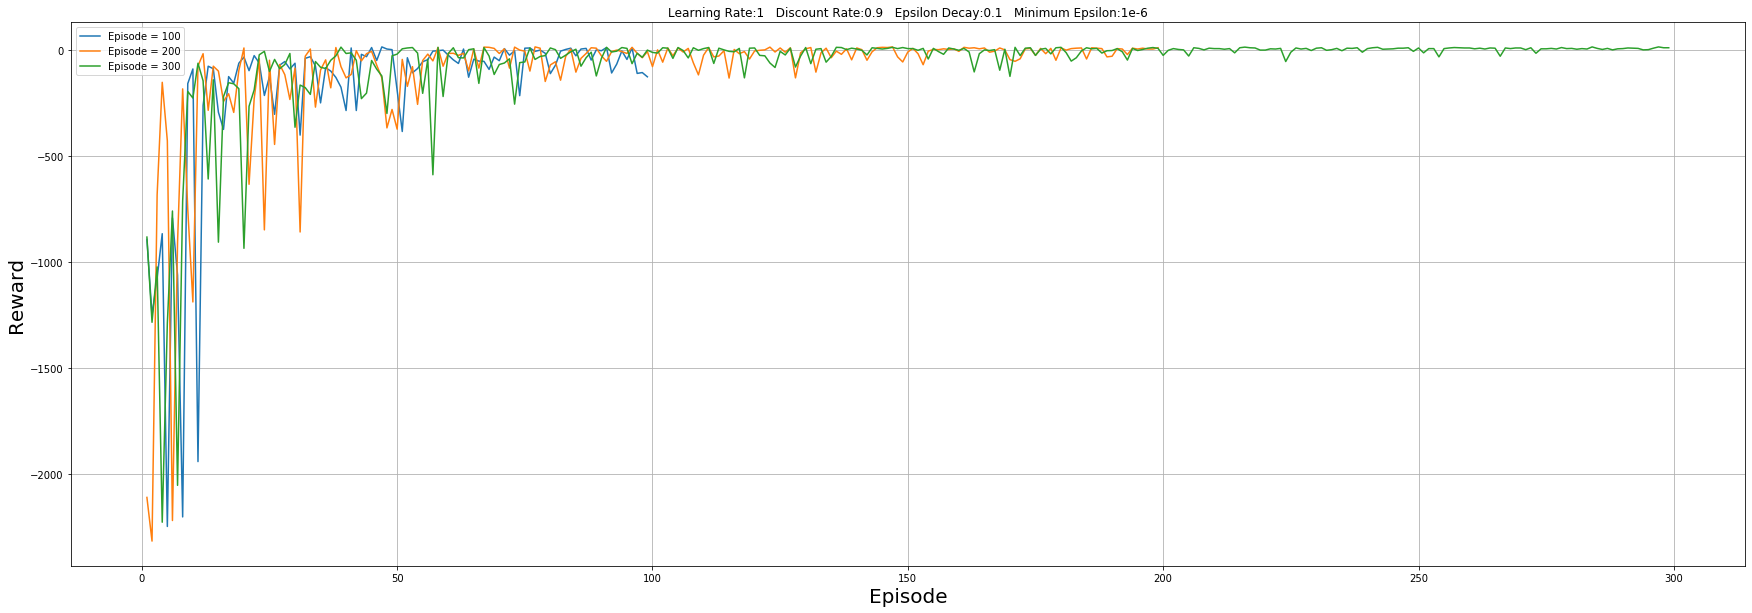

In [294]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
l1, = plt.plot(eps_list1, rw1, label="Episode = 100")
l2, = plt.plot(eps_list2, rw2, label= "Episode = 200" )
l3, = plt.plot(eps_list3, rw3, label= "Episode = 300" )
plt.legend(handles=[l1, l2, l3])

plt.xlabel("Episode", fontsize=20)
plt.ylabel("Reward", fontsize=20)
plt.title("Learning Rate:{}   Discount Rate:{}   Epsilon Decay:{}   Minimum Epsilon:1e-6".format(learning_rate,discount_rate,epsilon_decay))

plt.autoscale(axis='x',tight=False)
plt.grid(True)
plt.show()

In [296]:
rw1 = reward_list
eps_list1 = episode_list

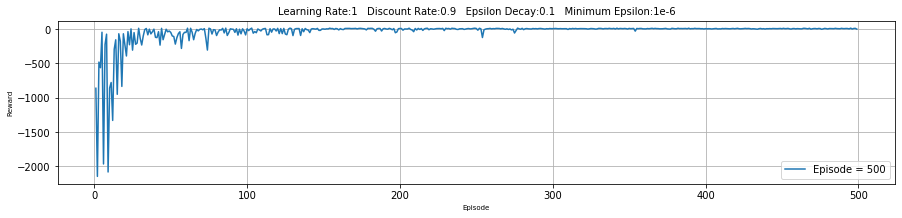

In [303]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size
l1, = plt.plot(eps_list1, rw1, label="Episode = 500")
plt.legend(handles=[l1])

plt.xlabel("Episode", fontsize=7)
plt.ylabel("Reward", fontsize=7)
plt.title("Learning Rate:{}   Discount Rate:{}   Epsilon Decay:{}   Minimum Epsilon:1e-6".format(learning_rate,discount_rate,epsilon_decay),fontsize=10)

plt.autoscale(axis='x',tight=False)
plt.grid(True)
plt.show()

### Learning Rate Experiment

In [305]:
rw1 = reward_list
eps_list1 = episode_list

In [307]:
rw2  = reward_list
eps_list2 = episode_list

In [309]:
rw3  = reward_list
eps_list3 = episode_list

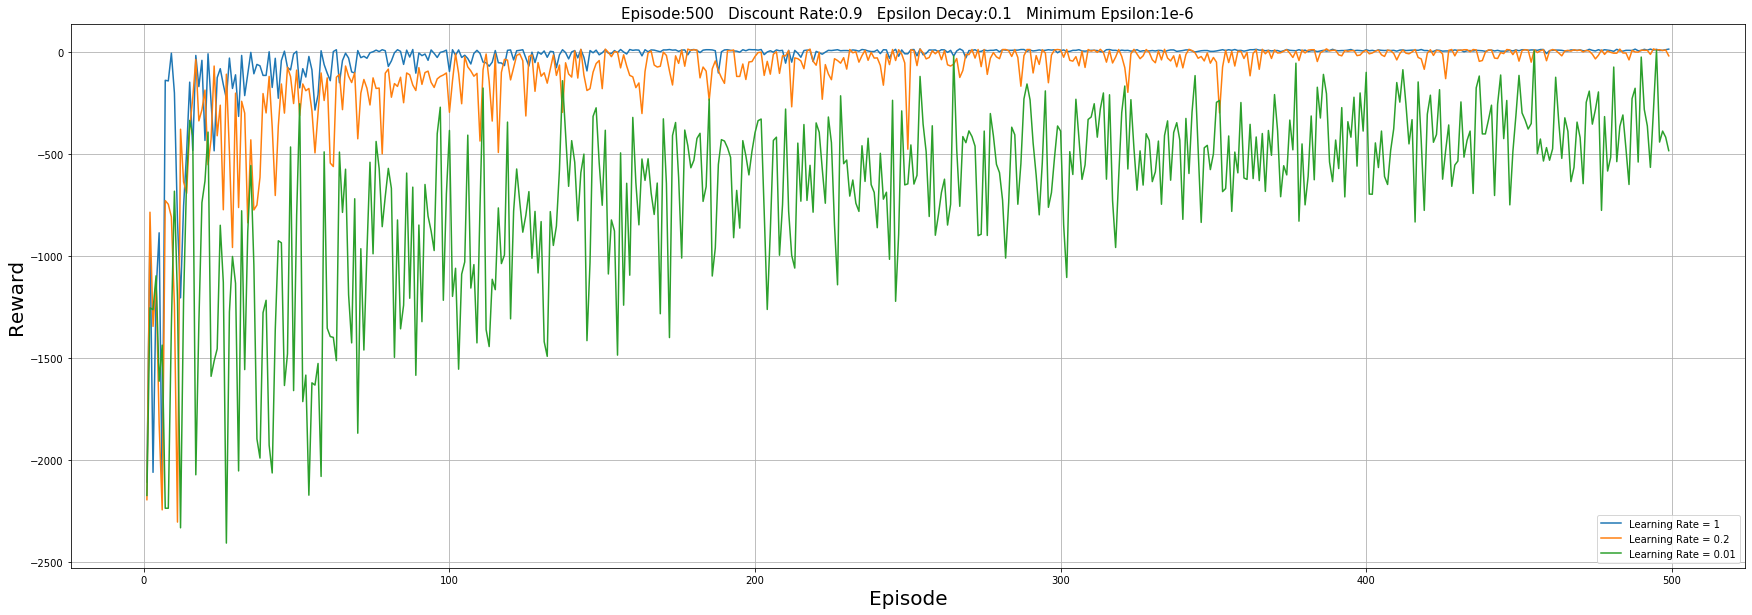

In [314]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
l1, = plt.plot(eps_list1, rw1, label="Learning Rate = 1")
l2, = plt.plot(eps_list2, rw2, label= "Learning Rate = 0.2" )
l3, = plt.plot(eps_list3, rw3, label= "Learning Rate = 0.01" )
plt.legend(handles=[l1, l2, l3])

plt.xlabel("Episode", fontsize=20)
plt.ylabel("Reward", fontsize=20)
plt.title("Episode:500   Discount Rate:{}   Epsilon Decay:{}   Minimum Epsilon:1e-6".format(discount_rate,epsilon_decay),fontsize = 15)

plt.autoscale(axis='x',tight=False)
plt.grid(True)
plt.show()

### Discount Rate Experiment

In [322]:
rw1 = reward_list
eps_list1 = episode_list

In [324]:
rw2  = reward_list
eps_list2 = episode_list

In [327]:
rw3  = reward_list
eps_list3 = episode_list

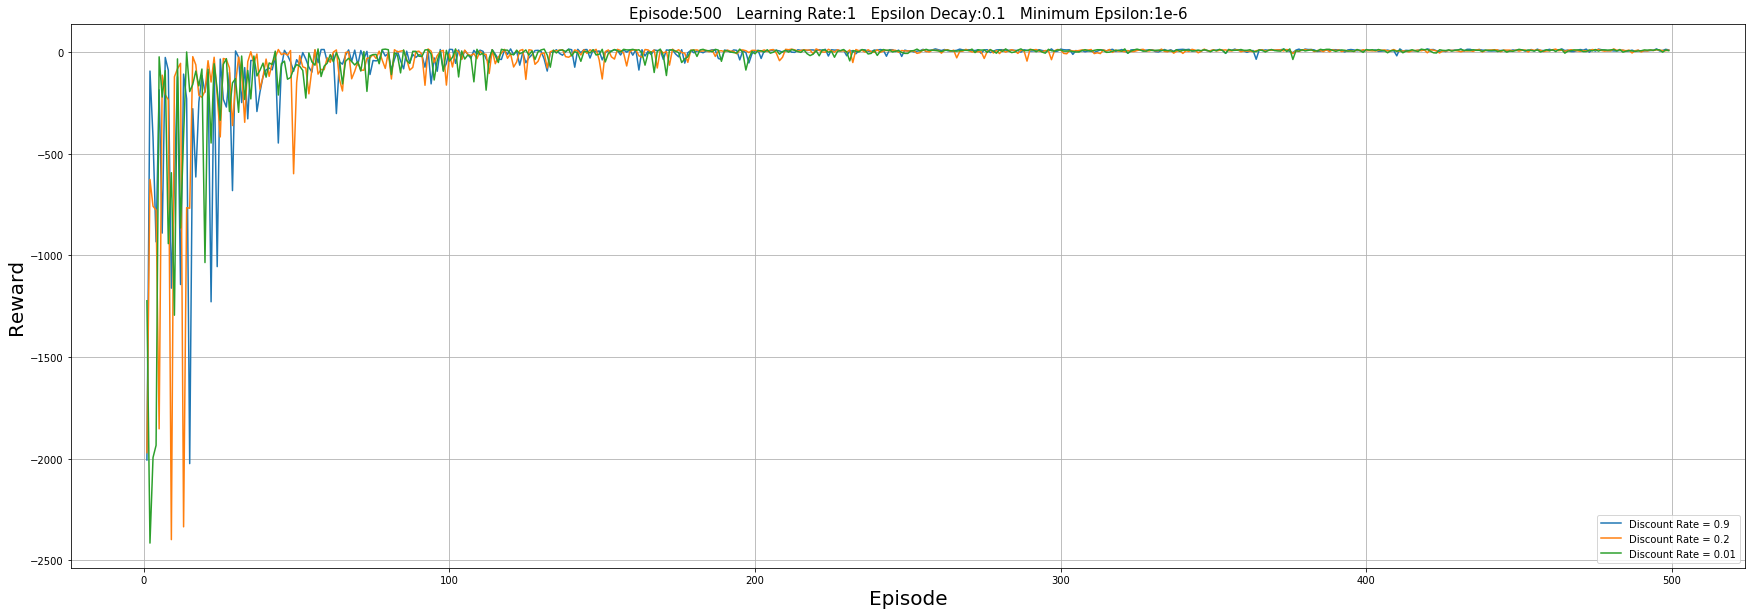

In [328]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
l1, = plt.plot(eps_list1, rw1, label="Discount Rate = 0.9")
l2, = plt.plot(eps_list2, rw2, label= "Discount Rate = 0.2" )
l3, = plt.plot(eps_list3, rw3, label= "Discount Rate = 0.01" )
plt.legend(handles=[l1, l2, l3])

plt.xlabel("Episode", fontsize=20)
plt.ylabel("Reward", fontsize=20)
plt.title("Episode:500   Learning Rate:{}   Epsilon Decay:{}   Minimum Epsilon:1e-6".format(learning_rate,epsilon_decay),fontsize = 15)

plt.autoscale(axis='x',tight=False)
plt.grid(True)
plt.show()

### Epsilon Decay Experiment

In [346]:
rw1 = reward_list
eps_list1 = episode_list

In [349]:
rw2  = reward_list
eps_list2 = episode_list

In [343]:
rw3  = reward_list
eps_list3 = episode_list

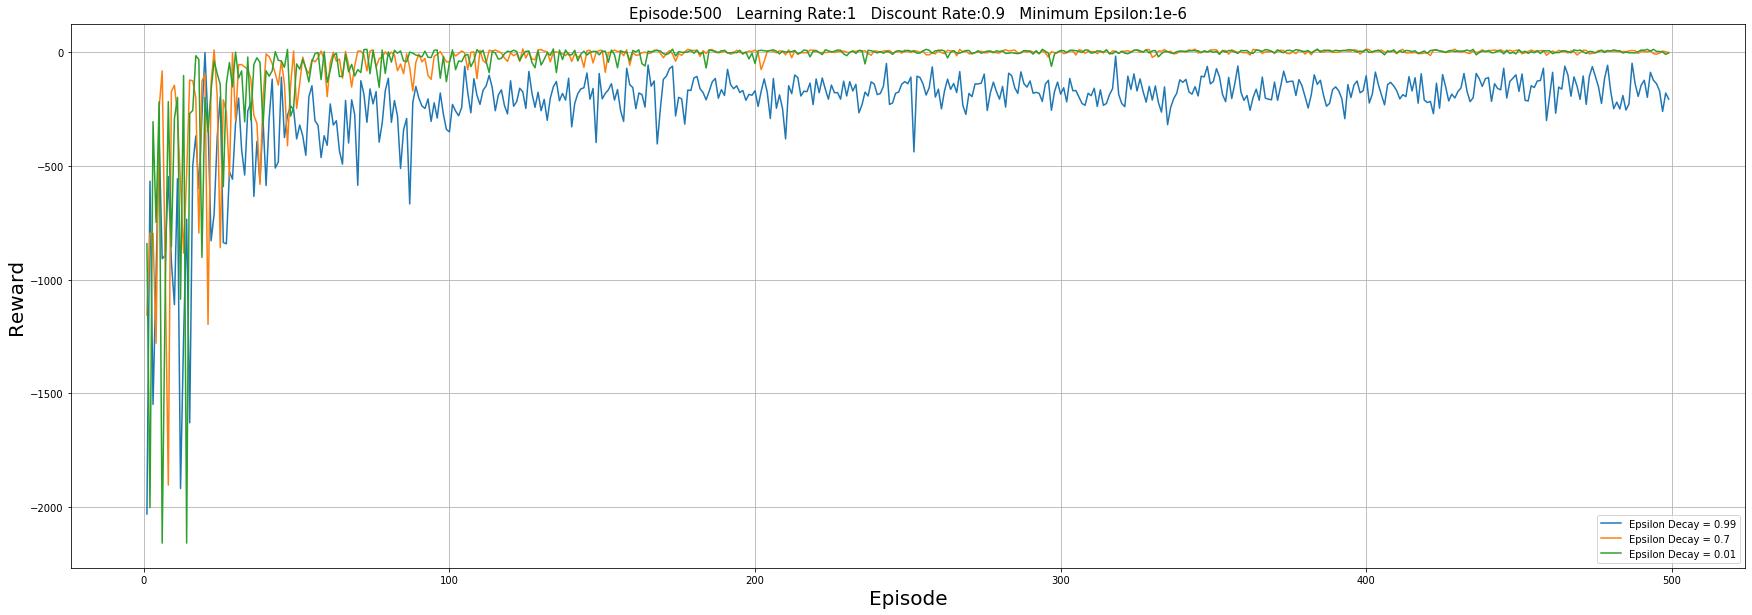

In [353]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
l1, = plt.plot(eps_list1, rw1, label="Epsilon Decay = 0.99")
l2, = plt.plot(eps_list2, rw2, label= "Epsilon Decay = 0.7" )
l3, = plt.plot(eps_list3, rw3, label= "Epsilon Decay = 0.01" )
plt.legend(handles=[l1, l2, l3])

plt.xlabel("Episode", fontsize=20)
plt.ylabel("Reward", fontsize=20)
plt.title("Episode:500   Learning Rate:{}   Discount Rate:{}   Minimum Epsilon:1e-6".format(learning_rate,discount_rate),fontsize = 15)

plt.autoscale(axis='x',tight=False)
plt.grid(True)
plt.show()